In [25]:
import numpy as np
import scanpy as sc
import scprep
import matplotlib.pyplot as plt
import phate
import pandas as pd
from sklearn.preprocessing import StandardScaler


In [26]:
adata = sc.read_h5ad('../data/rna_figure_ready.h5ad')

In [27]:
data = pd.read_csv(f'../data/6-mioflow-data-5d.csv')
scaler = StandardScaler()
columns_to_scale = [col for col in data.columns if col != 'samples']
data[columns_to_scale] = scaler.fit_transform(data[columns_to_scale])

In [28]:
X_phate = data[['d1', 'd2', 'd3', 'd4', 'd5']].values

In [29]:
trajs_hidim = np.load('x_traj_5.npy')

In [30]:
shapes = trajs_hidim.shape
trajs_h_f = trajs_hidim.reshape(-1, shapes[-1])

In [31]:
all_points = np.concatenate([X_phate, trajs_h_f], axis=0)

In [32]:
import phate
from phate import mds
phate_op = phate.PHATE(n_jobs=-1, n_components=2, random_state=42)
X_phate_5to2 = mds.embed_MDS(
    all_points,
    ndim=2,
    how=phate_op.mds,
    solver=phate_op.mds_solver,
    distance_metric=phate_op.mds_dist,
    n_jobs=phate_op.n_jobs,
    seed=phate_op.random_state,
    verbose=max(phate_op.verbose - 1, 0),
)

In [33]:
X_phate_5to2.shape

(21985, 2)

In [34]:
data_pts = X_phate_5to2[:adata.n_obs]
trajs_l_f = X_phate_5to2[adata.n_obs:]
trajs_l = trajs_l_f.reshape(shapes[0], shapes[1], 2)

In [35]:
np.save('x_traj_5to2.npy', trajs_l)

In [36]:
df = pd.DataFrame(data_pts, columns=['d1', 'd2'])
df['samples'] = data['samples']
# scaler = StandardScaler()
# columns_to_scale = [col for col in df.columns if col != 'samples']
# df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

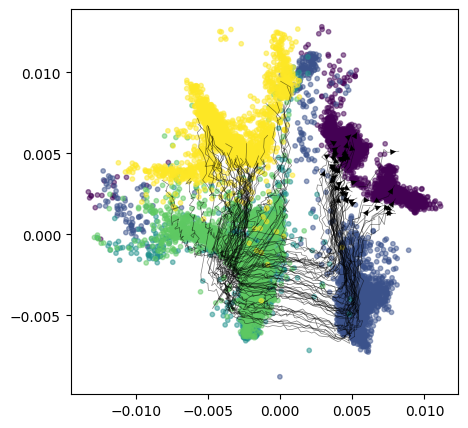

In [37]:
plt.figure(figsize=(5, 5))
plt.scatter(df['d1'], df['d2'],
                c=df['samples'] , cmap='viridis', s=10, alpha=.5)
for i,traj in enumerate(np.transpose(trajs_l, axes=(1,0,2))):
    plt.plot(traj[:, 0], traj[:, 1], alpha=.5, linewidth=.5, color='Black');
    plt.annotate('', xy=(traj[-1, 0], traj[-1, 1]), xytext=(traj[-2, 0], traj[-2, 1]),
                 arrowprops=dict(arrowstyle="-|>", color='Black', lw=.1))
